# First look on housing data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from chapter2 import conf
from chapter2.data import make_dataset

%reload_ext autoreload
%aimport chapter2.conf
%aimport chapter2.data.make_dataset
%autoreload 1

In [5]:
housing = make_dataset.load_data(
    conf.ROOT_DATA_DIR, conf.DataDirectory.RAW, "housing.csv"
)

## Descriptive statistics

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We have neighboor and housing information. Neighbors seems to be identified by longitude and latitude.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Only numerical columns except `ocean_proximity`.
* Apparent missing values for `total_bedrooms`.

In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

5 distinct values, with `ISLAND` having only 5 occurences over 20640 observations.

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Bedrooms and rooms are global values by district.
* Median income is probably in k$.

2021-12-02 11:33:50,801 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-12-02 11:33:50,807 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-machine-learning/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2021-12-02 11:33:50,810 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-machine-learning/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2021-12-02 11:33:50,812 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-mac

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

2021-12-02 11:33:52,628 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2021-12-02 11:33:52,629 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-machine-learning/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2021-12-02 11:33:52,630 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-machine-learning/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2021-12-02 11:33:52,632 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/baptiste/.pyenv/versions/3.10.0/envs/hands-on-mac

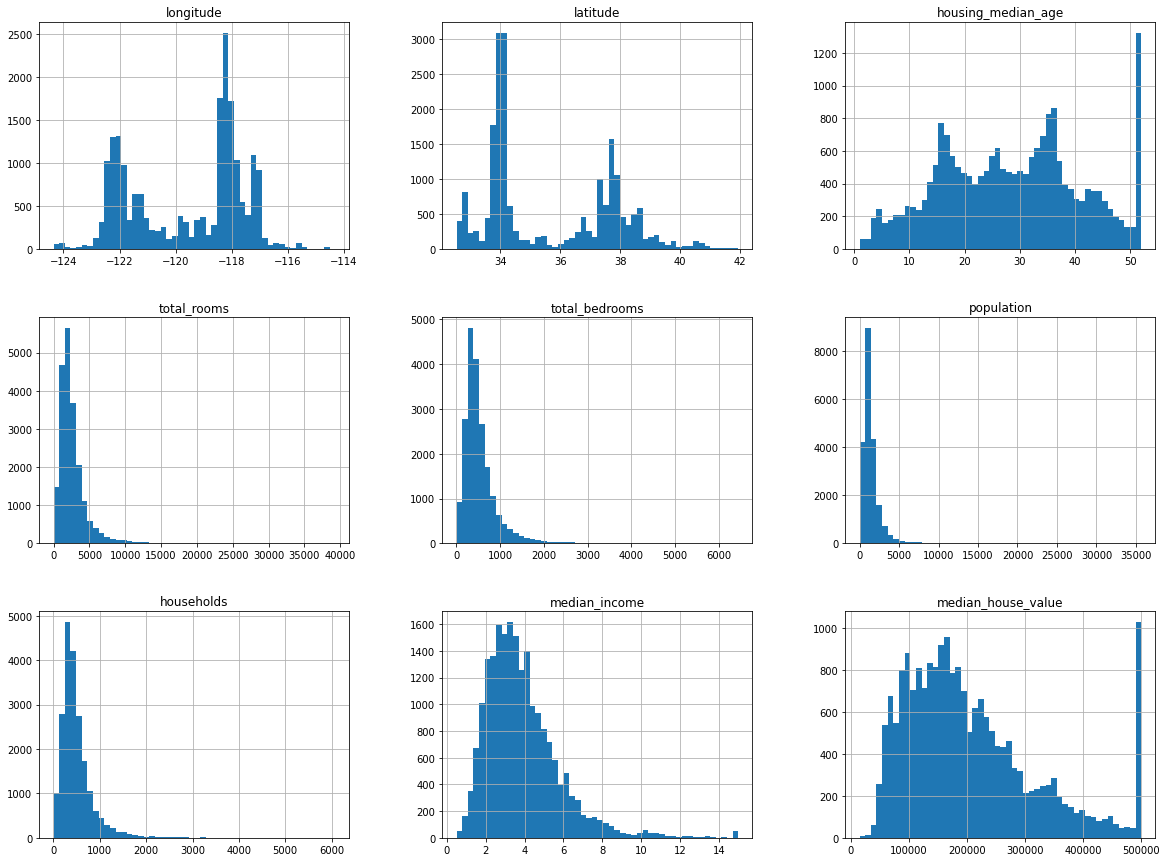

In [10]:
housing.hist(bins=50, figsize=(20, 15))

* housing median age is multimodal
* `total_rooms`, `total_bedrooms`, `populations`, `households` and `median_income` are right skewed
* `median_house_value`(**target variable**) might me bimodal, left skewed with a ceiling at 500k.

## Train/test sets

Before going further lets take the time to split our data sets and check the resulting distribution.

In [26]:
data = pd.concat([train, test], keys=["train", "test"])
data.droplevel(1).reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,train,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,288500.0
1,train,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,198400.0
2,train,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,360900.0
3,train,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,439100.0
4,train,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,262300.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,test,-118.23,33.91,34.0,789.0,200.0,1041.0,191.0,3.1190,<1H OCEAN,90300.0
20636,test,-117.86,33.61,15.0,3191.0,482.0,930.0,447.0,8.6001,<1H OCEAN,500001.0
20637,test,-121.29,38.68,20.0,1881.0,378.0,921.0,360.0,1.8589,INLAND,144000.0
20638,test,-117.19,32.82,35.0,1074.0,180.0,442.0,173.0,5.2530,NEAR OCEAN,204000.0


2021-12-02 15:07:01,186 - chapter2.data.make_dataset - DEBUG - (16512,)
2021-12-02 15:07:01,188 - chapter2.data.make_dataset - DEBUG - (16512, 9)


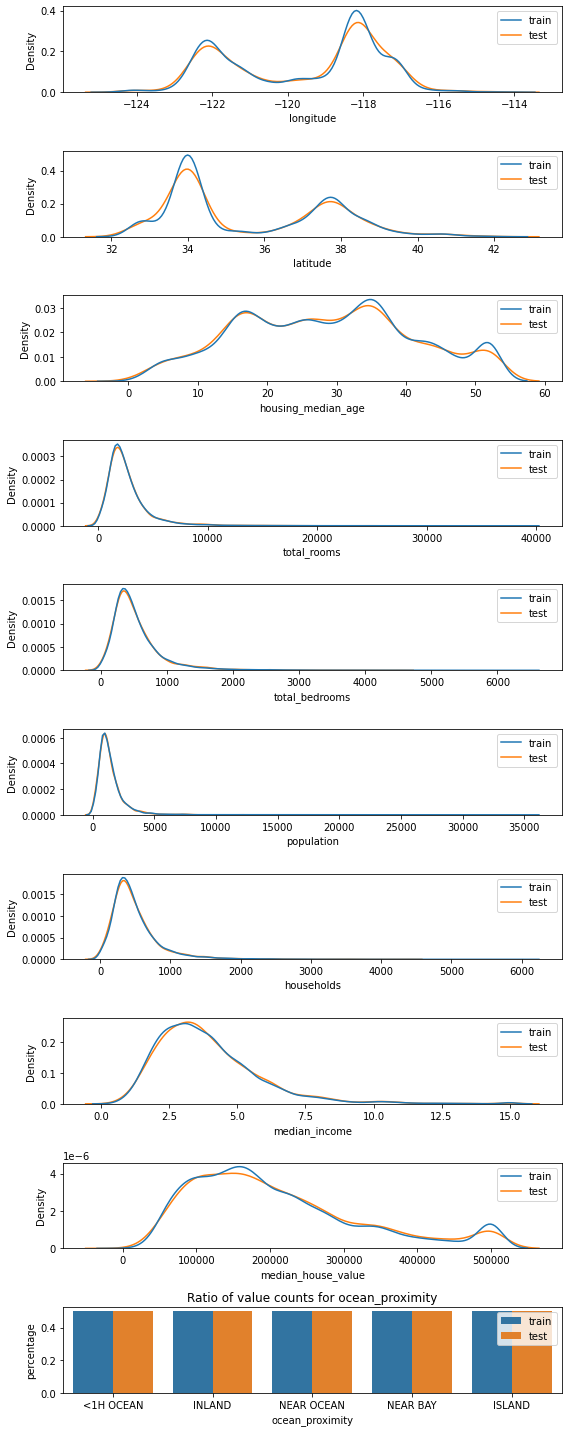

In [35]:
train, test = make_dataset.train_test_split(housing)
data = pd.concat([train, test], keys=["train", "test"]).droplevel(1).reset_index()

fig, ax = plt.subplots(nrows=len(train.columns), figsize=(8, 20))
for ix, column in enumerate(data.drop(["ocean_proximity", "index"], axis=1).columns):
    g = sns.kdeplot(
        data=data,
        x=column,
        ax=ax.flat[ix],
        hue="index",
        common_norm=False,
    )
    g.get_legend().set_title(None)


(
    pd.DataFrame(
        {
            "train": train["ocean_proximity"].value_counts(normalize=True),
            "test": test["ocean_proximity"].value_counts(normalize=True),
        }
    )
    .reset_index()
    .rename(columns={"index": "ocean_proximity"})
    .assign(row_sum=lambda x: x.train + x.test)
    .assign(train=lambda x: x.train / x.row_sum)
    .assign(test=lambda x: x.test / x.row_sum)
    .drop("row_sum", axis=1)
    .pipe(
        (pd.melt, "frame"),
        id_vars="ocean_proximity",
        var_name="train_test",
        value_name="percentage",
    )
    .pipe(
        (sns.barplot, "data"),
        hue="train_test",
        x="ocean_proximity",
        y="percentage",
        ax=ax.flat[-1],
    )
)
ax.flat[-1].set_title("Ratio of value counts for ocean_proximity")
plt.tight_layout()
plt.legend(loc="upper right")